In [3]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy



In [10]:
# import merged dataframe
path = r'/Users/gomula/Documents/Instacart Basket Analysis 14.05.2023'
ords_prods_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_ver3.pkl'))
ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prder_price,spending_flag,order_frequency,frequency_flag
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New_customer,6.367797,Low spender,20.0,Regular customer


<Axes: >

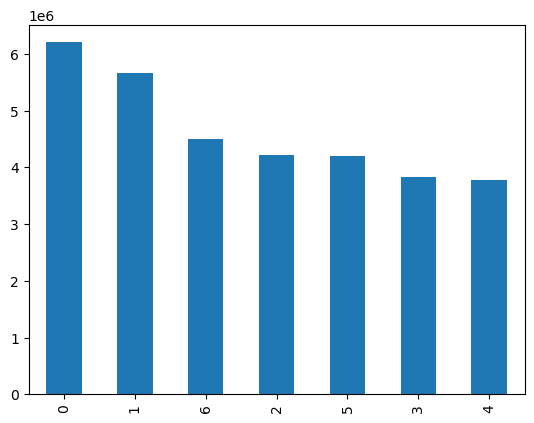

In [4]:
ords_prods_merged['order_dow'].value_counts().plot.bar()

<Axes: >

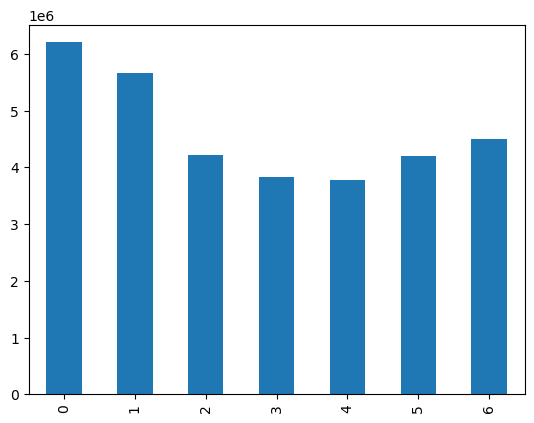

In [5]:
ords_prods_merged['order_dow'].value_counts().sort_index().plot.bar()

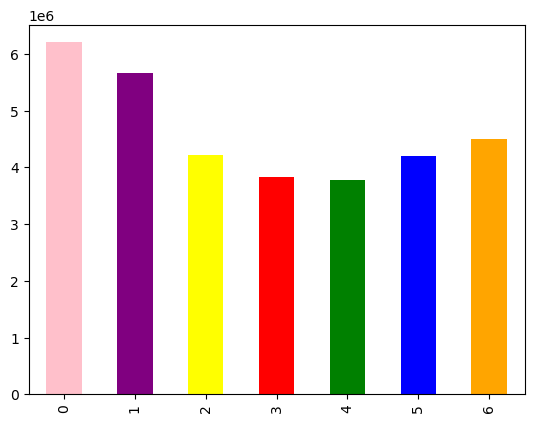

In [7]:
bar = ords_prods_merged['order_dow'].value_counts().sort_index().plot.bar(color=['pink', 'purple', 'yellow', 'red', 'green', 'blue', 'orange'])

In [8]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'bar_chart.jpg'))

#### Histograms plots

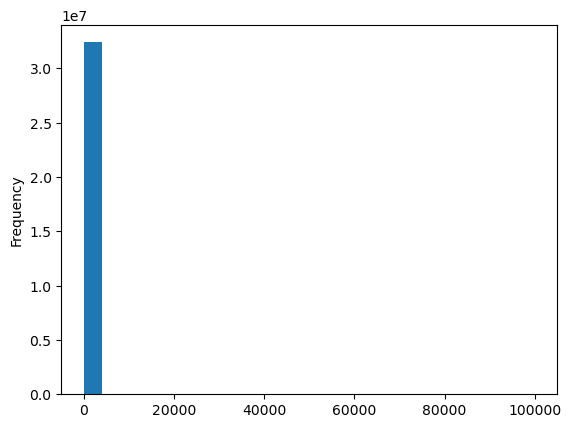

In [9]:
hist = ords_prods_merged['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

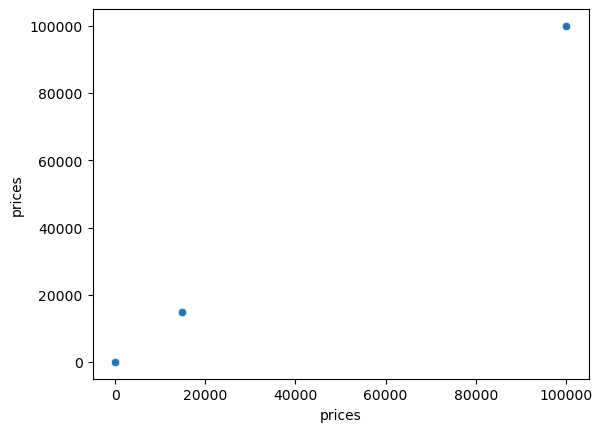

In [10]:
sns.scatterplot(x='prices', y='prices', data=ords_prods_merged)

In [11]:
ords_prods_merged.loc[ords_prods_merged['prices']>100, ['prices']]

,prices
10030345,14900.0
10030346,14900.0
10030347,14900.0
10030348,14900.0
10030349,14900.0
...,...
29166209,99999.0
29166210,99999.0
29166211,99999.0
29166212,99999.0


In [12]:
# turn the unxpected values into missing value
ords_prods_merged.loc[ords_prods_merged['prices']>100, ['prices']] = np.nan

In [13]:
ords_prods_merged['prices'].max()

25.0

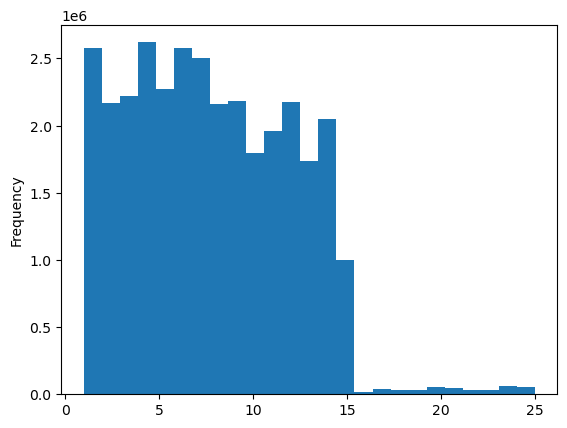

In [14]:
hist = ords_prods_merged['prices'].plot.hist(bins=25)

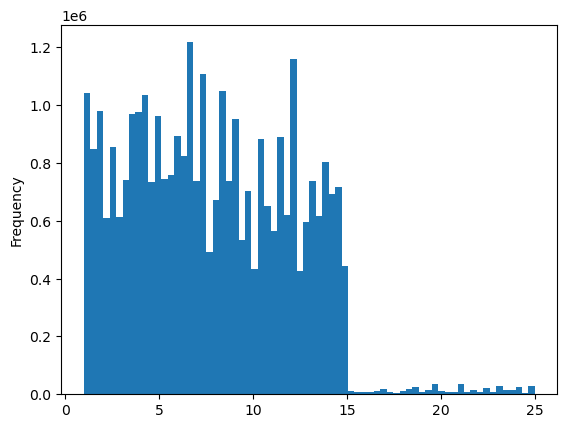

In [15]:
hist = ords_prods_merged['prices'].plot.hist(bins=70)

In [16]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'histogram.jpg'))

###  Create subsample

In [17]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
big = ords_prods_merged[dev]

In [20]:
small = ords_prods_merged[~dev]

In [22]:
len(small)+len(big)

32404859

In [24]:
df_2 = small[['order_dow', 'prices']]

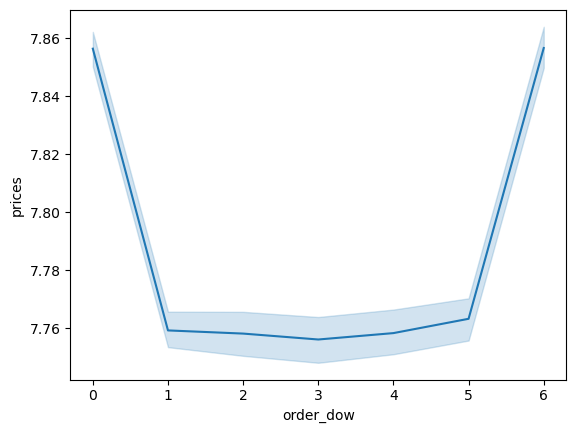

In [26]:
line = sns.lineplot(data = df_2, x='order_dow', y='prices')

In [11]:
df_4 = ords_prods_merged[['order_dow', 'prices']]

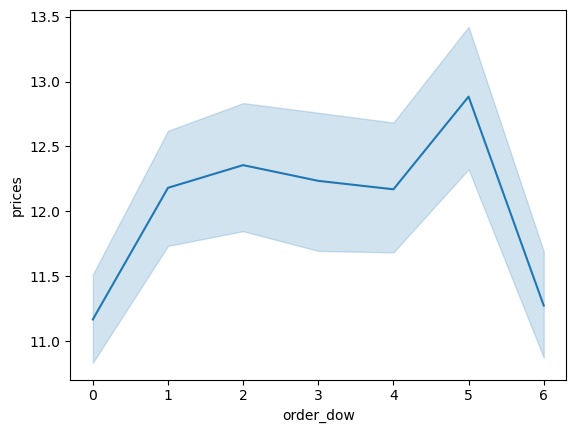

In [12]:
line_2 = sns.lineplot(data = df_4, x='order_dow', y='prices')

In [31]:
ords_prods_merged['prices'].value_counts()

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 240, dtype: int64

In [32]:
df_4['prices'].value_counts()

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 240, dtype: int64

In [33]:
ords_prods_merged.groupby('order_dow').agg({'prices': ['mean', 'max', 'min']})

prices           
               mean   max  min
order_dow                     
0          7.857590  25.0  1.0
1          7.759697  25.0  1.0
2          7.754309  25.0  1.0
3          7.757485  25.0  1.0
4          7.756223  25.0  1.0
5          7.762477  25.0  1.0
6          7.857431  25.0  1.0